#### Random Sample imputation

Aim : Random sample imputation consists of taking random observation from the dataset and we use this observation to replace nan values

When it should be used?

It assumes that the data is missing completely at random

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("/home/shivasai7392/Desktop/DS/Assignments/Kaggle/Titanic/train.csv",usecols=["Age","Fare","Survived"])

In [4]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
data.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
data.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [36]:
def impute_nan(data,feature):
    data[feature+"_median"] = data[feature].fillna(data[feature].median())
    data[feature+"_random"] = data[feature]
    random_sample = data[feature].dropna().sample(data[feature].isnull().sum(),random_state =0)
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature+"_random"] = random_sample
    
    

In [37]:
impute_nan(data,"Age")

In [38]:
data.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [39]:
data.isna().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

In [18]:
data.Age.isnull().sum()

177

In [16]:
b = a.dropna()

In [20]:
a = b.sample(data.Age.isnull().sum())

In [22]:
a

73     26.0
532    17.0
129    45.0
579    32.0
317    54.0
165     9.0
637    31.0
575    19.0
417    18.0
30     40.0
134    25.0
866    27.0
12     20.0
716    38.0
164     1.0
529    23.0
171     4.0
175    18.0
599    49.0
280    65.0
634     9.0
278     7.0
429    32.0
838    32.0
615    24.0
714    52.0
353    25.0
821    27.0
209    40.0
207    26.0
       ... 
441    20.0
373    22.0
407     3.0
631    51.0
848    28.0
702    18.0
8      27.0
75     25.0
163    17.0
249    54.0
785    25.0
456    65.0
691     4.0
443    28.0
0      22.0
549     8.0
390    36.0
267    25.0
461    34.0
135    23.0
438    64.0
687    19.0
143    19.0
887    19.0
253    30.0
491    21.0
316    24.0
412    33.0
406    51.0
230    35.0
Name: Age, Length: 177, dtype: float64

In [23]:
a.index

Int64Index([ 73, 532, 129, 579, 317, 165, 637, 575, 417,  30,
            ...
            438, 687, 143, 887, 253, 491, 316, 412, 406, 230],
           dtype='int64', length=177)

In [27]:
a.index = data[data.Age.isnull()].index

In [28]:
a

5      26.0
17     17.0
19     45.0
26     32.0
28     54.0
29      9.0
31     31.0
32     19.0
36     18.0
42     40.0
45     25.0
46     27.0
47     20.0
48     38.0
55      1.0
64     23.0
65      4.0
76     18.0
77     49.0
82     65.0
87      9.0
95      7.0
101    32.0
107    32.0
109    24.0
121    52.0
126    25.0
128    27.0
140    40.0
154    26.0
       ... 
718    20.0
727    22.0
732     3.0
738    51.0
739    28.0
740    18.0
760    27.0
766    25.0
768    17.0
773    54.0
776    25.0
778    65.0
783     4.0
790    28.0
792    22.0
793     8.0
815    36.0
825    25.0
826    34.0
828    23.0
832    64.0
837    19.0
839    19.0
846    19.0
849    30.0
859    21.0
863    24.0
868    33.0
878    51.0
888    35.0
Name: Age, Length: 177, dtype: float64

In [32]:
data.loc[data["Age"].isnull(),"Age_random"] = a.values

In [33]:
data.loc[data["Age"].isnull(),"Age_random"]

5      26.0
17     17.0
19     45.0
26     32.0
28     54.0
29      9.0
31     31.0
32     19.0
36     18.0
42     40.0
45     25.0
46     27.0
47     20.0
48     38.0
55      1.0
64     23.0
65      4.0
76     18.0
77     49.0
82     65.0
87      9.0
95      7.0
101    32.0
107    32.0
109    24.0
121    52.0
126    25.0
128    27.0
140    40.0
154    26.0
       ... 
718    20.0
727    22.0
732     3.0
738    51.0
739    28.0
740    18.0
760    27.0
766    25.0
768    17.0
773    54.0
776    25.0
778    65.0
783     4.0
790    28.0
792    22.0
793     8.0
815    36.0
825    25.0
826    34.0
828    23.0
832    64.0
837    19.0
839    19.0
846    19.0
849    30.0
859    21.0
863    24.0
868    33.0
878    51.0
888    35.0
Name: Age_random, Length: 177, dtype: float64

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

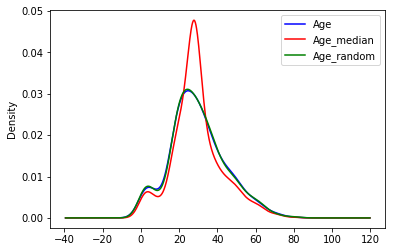

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
data["Age"].plot(kind = "kde",ax=ax,color = "blue")
data.Age_median.plot(kind = "kde",ax =ax,color = "red")
data.Age_random.plot(kind = "kde",ax =ax,color = "green")
lines,labels =  ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = "best")


#### Advantages

1.easy to implement

2.less distortion in variance

#### Disadvantages

1.Every situation randomness won't work